In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv('Chicago_Crime_Detective.csv',index_col=0, low_memory=False)
df.head()

,ID,Date,LocationDescription,Arrest,Domestic,Beat,District,CommunityArea,Year
0,8951354,12/31/12 23:15,STREET,False,False,623,6,69,2012
1,8951141,12/31/12 22:00,STREET,False,False,1213,12,24,2012
2,8952745,12/31/12 22:00,RESIDENTIAL YARD (FRONT/BACK),False,False,1622,16,11,2012
3,8952223,12/31/12 22:00,STREET,False,False,724,7,67,2012
4,8951608,12/31/12 21:30,STREET,False,False,211,2,35,2012


In [4]:
dir(df)

['Arrest',
 'Beat',
 'CommunityArea',
 'Date',
 'District',
 'Domestic',
 'ID',
 'LocationDescription',
 'T',
 'Year',
 '_AXIS_ALIASES',
 '_AXIS_IALIASES',
 '_AXIS_LEN',
 '_AXIS_NAMES',
 '_AXIS_NUMBERS',
 '_AXIS_ORDERS',
 '_AXIS_REVERSED',
 '_AXIS_SLICEMAP',
 '__abs__',
 '__add__',
 '__and__',
 '__array__',
 '__array_wrap__',
 '__bool__',
 '__bytes__',
 '__class__',
 '__contains__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__div__',
 '__doc__',
 '__eq__',
 '__finalize__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__ifloordiv__',
 '__imod__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__module__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__nonzero__'

In [5]:
print(df.dtypes)

ID                      int64
Date                   object
LocationDescription    object
Arrest                   bool
Domestic                 bool
Beat                    int64
District               object
CommunityArea          object
Year                    int64
dtype: object


In [6]:
#df['Date']= pd.to_datetime(df.Date)
import dateutil
df['Date'] = df['Date'].apply(dateutil.parser.parse, dayfirst=True)

In [7]:
df.Date

0        2012-12-31 23:15:00
1        2012-12-31 22:00:00
2        2012-12-31 22:00:00
3        2012-12-31 22:00:00
4        2012-12-31 21:30:00
5        2012-12-31 20:30:00
6        2012-12-31 20:10:00
7        2012-12-31 20:00:00
8        2012-12-31 19:00:00
9        2012-12-31 18:00:00
10       2012-12-31 18:00:00
11       2012-12-31 17:00:00
12       2012-12-31 16:30:00
13       2012-12-31 16:20:00
14       2012-12-31 16:15:00
15       2012-12-31 16:00:00
16       2012-12-31 16:00:00
17       2012-12-31 16:00:00
18       2012-12-31 14:36:00
19       2012-12-31 13:45:00
20       2012-12-31 13:15:00
21       2012-12-31 10:00:00
22       2012-12-31 09:30:00
23       2012-12-31 09:00:00
24       2012-12-31 08:20:00
25       2012-12-31 08:05:00
26       2012-12-31 07:05:00
27       2012-12-31 07:00:00
28       2012-12-31 07:00:00
29       2012-12-31 06:50:00
                 ...        
191611   2001-01-01 13:00:00
191612   2001-01-01 13:00:00
191613   2001-01-01 12:00:00
191614   2001-

In [8]:
df.dtypes

ID                              int64
Date                   datetime64[ns]
LocationDescription            object
Arrest                           bool
Domestic                         bool
Beat                            int64
District                       object
CommunityArea                  object
Year                            int64
dtype: object

In [9]:
df.head()

,ID,Date,LocationDescription,Arrest,Domestic,Beat,District,CommunityArea,Year
0,8951354,2012-12-31 23:15:00,STREET,False,False,623,6,69,2012
1,8951141,2012-12-31 22:00:00,STREET,False,False,1213,12,24,2012
2,8952745,2012-12-31 22:00:00,RESIDENTIAL YARD (FRONT/BACK),False,False,1622,16,11,2012
3,8952223,2012-12-31 22:00:00,STREET,False,False,724,7,67,2012
4,8951608,2012-12-31 21:30:00,STREET,False,False,211,2,35,2012


In [10]:
df.corr()

,ID,Arrest,Domestic,Beat,Year
ID,1.000000,-0.090864,0.030879,-0.002225,0.995614
Arrest,-0.090864,1.000000,0.012896,-0.001383,-0.090279
Domestic,0.030879,0.012896,1.000000,-0.007283,0.031091
Beat,-0.002225,-0.001383,-0.007283,1.000000,-0.003057
Year,0.995614,-0.090279,0.031091,-0.003057,1.000000


In [11]:
df.shape

(191641, 9)

In [12]:
df.Domestic.value_counts()

False    191226
True        415
Name: Domestic, dtype: int64

In [13]:
df.Arrest.value_counts()

False    176105
True      15536
Name: Arrest, dtype: int64

In [14]:
df[['Domestic','Arrest']]= df[['Domestic','Arrest']].astype(int)

In [15]:
df.head()

,ID,Date,LocationDescription,Arrest,Domestic,Beat,District,CommunityArea,Year
0,8951354,2012-12-31 23:15:00,STREET,0,0,623,6,69,2012
1,8951141,2012-12-31 22:00:00,STREET,0,0,1213,12,24,2012
2,8952745,2012-12-31 22:00:00,RESIDENTIAL YARD (FRONT/BACK),0,0,1622,16,11,2012
3,8952223,2012-12-31 22:00:00,STREET,0,0,724,7,67,2012
4,8951608,2012-12-31 21:30:00,STREET,0,0,211,2,35,2012


In [16]:
df.dtypes

ID                              int64
Date                   datetime64[ns]
LocationDescription            object
Arrest                          int32
Domestic                        int32
Beat                            int64
District                       object
CommunityArea                  object
Year                            int64
dtype: object

In [17]:
df.isnull().sum()

ID                         0
Date                       0
LocationDescription        0
Arrest                     0
Domestic                   0
Beat                       0
District               43052
CommunityArea          24603
Year                       0
dtype: int64

In [18]:
#df[['District','CommunityArea']]= df[['District','CommunityArea']].astype(int)

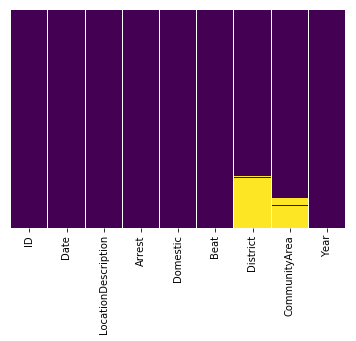

In [19]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

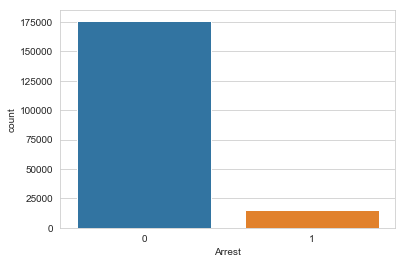

In [20]:
sns.set_style('whitegrid')
sns.countplot(x='Arrest',data=df)

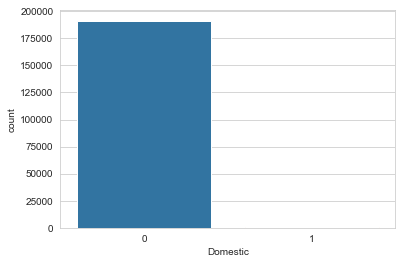

In [26]:
sns.countplot(x='Domestic',data=df)

### What is the Month and Year of the median date in our dataset? 

In [27]:
dates = list(df.sort_values('Date')['Date'])
dates[len(dates)//2]

Timestamp('2006-05-24 22:00:00')

In [28]:
dates[(len(dates)+1)//2]

Timestamp('2006-05-24 22:00:00')

### In which month did the lowest motor vehicle thefts occur? 

In [29]:
df.Date.dt.month.value_counts()

10    16977
7     16733
12    16417
1     16325
5     16298
8     16288
9     16009
3     15895
6     15894
11    15765
4     15086
2     13954
Name: Date, dtype: int64

In [30]:
df.Date.dt.month.value_counts().idxmin()

2

### On which weekday did most motor vehicle thefts occur?

In [31]:
df.Date.dt.weekday_name.value_counts()

Friday       28545
Saturday     27406
Wednesday    27387
Monday       27372
Tuesday      27141
Thursday     27067
Sunday       26723
Name: Date, dtype: int64

In [32]:
df.Date.dt.weekday_name.value_counts().idxmax()

'Friday'

### Each observation in the dataset represents a motor vehicle theft, and the Arrest variable indicates whether an arrest was later made for this theft. Which month has the largest number of motor vehicle thefts for which an arrest was made?

In [33]:
df.Arrest.value_counts()

0    176105
1     15536
Name: Arrest, dtype: int64

In [34]:
df1 = df[df['Arrest'] == 1]

In [35]:
df1.shape

(15536, 9)

In [36]:
df1.Date.dt.month.value_counts()

10    1381
12    1358
7     1354
1     1352
3     1295
8     1287
4     1268
11    1265
5     1253
6     1248
9     1247
2     1228
Name: Date, dtype: int64

In [37]:
df1.Date.dt.month.value_counts().idxmax()

10

---------------------

In [38]:
df2 = df.Date.dt.year
#df2=df2.sort_values()

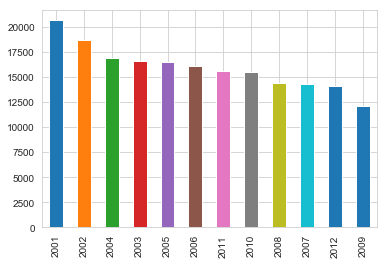

In [39]:
df2.value_counts().plot(kind='bar')

-------------------------------------------

In [40]:
df3 = df1.Date.dt.year 

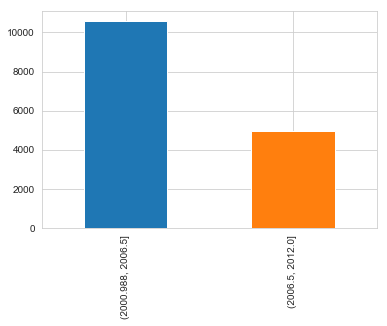

In [41]:
df3.value_counts(bins=2).plot(kind='bar')

### For what proportion of motor vehicle thefts in 2001 was an arrest made? 

In [92]:
#df.Date.dt.year.value_counts()

In [87]:
Count1 = df.Year.eq(2001).sum()
Count1

20669

In [93]:
#df1.Date.dt.year.value_counts()

In [89]:
Count2 = df1.Year.eq(2001).sum()
Count2

2152

In [91]:
veh_theft_pr = Count2/Count1
veh_theft_pr

0.10411727708161982

In [103]:
#2152/20669

-----------------

### For what proportion of motor vehicle thefts in 2007 was an arrest made?

In [95]:
Count3 = df.Year.eq(2007).sum()
Count3

14280

In [98]:
Count4 = df1.Year.eq(2007).sum()
Count4

1212

In [101]:
theft = Count4/Count3
round(theft,2)

0.08

In [102]:
#round((1212/14280),2)

### Which locations are the top five locations for motor vehicle thefts, excluding the "Other" category?

In [256]:
df4 = df['LocationDescription'].value_counts()
df4

STREET                                             156564
PARKING LOT/GARAGE(NON.RESID.)                      14852
OTHER                                                4573
ALLEY                                                2308
GAS STATION                                          2111
DRIVEWAY - RESIDENTIAL                               1675
RESIDENTIAL YARD (FRONT/BACK)                        1536
RESIDENCE                                            1302
RESIDENCE-GARAGE                                     1176
VACANT LOT/LAND                                       985
VEHICLE NON-COMMERCIAL                                817
SIDEWALK                                              462
CHA PARKING LOT/GROUNDS                               405
AIRPORT/AIRCRAFT                                      363
POLICE FACILITY/VEH PARKING LOT                       266
PARK PROPERTY                                         255
SCHOOL, PUBLIC, GROUNDS                               206
APARTMENT     

### Create a subset of your data, only taking observations for which the theft happened in one of these five locations, and call this new data set "Top5". How many observations are in Top5?

In [257]:
Top5 = df4[0:6]

In [258]:
Top5= pd.DataFrame(Top5)
Top5

,LocationDescription
STREET,156564
PARKING LOT/GARAGE(NON.RESID.),14852
OTHER,4573
ALLEY,2308
GAS STATION,2111
DRIVEWAY - RESIDENTIAL,1675


In [259]:
Top5.drop('OTHER',axis=0,inplace=True)

In [260]:
Top5.sum()

LocationDescription    177510
dtype: int64

### On which day of the week do the most motor vehicle thefts at gas stations happen?

In [219]:
df_loc_gas = df[ df['LocationDescription'] == 'GAS STATION']

In [221]:
df_loc_gas.Date.dt.weekday_name.value_counts()

Saturday     345
Sunday       318
Friday       316
Wednesday    294
Monday       287
Thursday     282
Tuesday      269
Name: Date, dtype: int64